# 🚨ML-Based Fake Job Postings Detector Using NLP and Machine Learning

## 1.IMPORT LIBRARIES

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2.DATA LOADING

In [44]:
df = pd.read_csv(r"C:\Users\user\Music\FINAL_PROJECTS\PROJECT1_FAKE_JOB_DETECTOR\archive\fake_job_postings.csv")
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## 3.UNDERSTANDING THE DATASET

In [45]:
df.shape

(17880, 18)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [47]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
df['fraudulent'].value_counts()

fraudulent
0    17014
1      866
Name: count, dtype: int64

In [49]:
df['fraudulent'].value_counts(normalize=True) * 100

fraudulent
0    95.1566
1     4.8434
Name: proportion, dtype: float64

In [50]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

## 4.DATA PREPROCESSING

### 4.1.DROP COLUMNS

In [51]:
df.drop(['job_id', 'telecommuting', 'has_company_logo', 'has_questions','salary_range'], axis=1, inplace=True)

In [52]:
df.shape

(17880, 13)

In [53]:
df.sample(5)

,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
3249,Account Manager,"GR, , Athens",Performance Marketing,We are a startup digital agency that is “helpi...,We are a startup digital agency growing at a p...,To excel in this position you have be able to ...,We provide extremely high-quality services to ...,Full-time,Associate,Master's Degree,Marketing and Advertising,NaN,0
7413,Social Media Editor,"GR, I, Athens",Huffington Post Greece,24MEDIA is Greece's leading and fastest-growin...,"The role will involve producing viral content,...",Ideal candidates should have the following ski...,NaN,NaN,NaN,NaN,Online Media,NaN,0
4154,General/Office Manager,"GB, , Belfast",NaN,Uni Baggage is the No.1 Student Shipping compa...,Uni Baggage is the No.1 Student Shipping compa...,Essential2+ years experience in an office base...,Competitive salaryRelaxed office environmentSt...,Full-time,Mid-Senior level,High School or equivalent,Logistics and Supply Chain,Management,0
17400,Sales Representative,"US, VA, Hampton",NaN,NaN,"Westview Financial Services, located in Hampto...",The qualifications for this position are:• A m...,We offer a competitive salary as well as a com...,Full-time,Associate,Unspecified,Financial Services,Sales,0
11292,English Teacher Abroad,"US, TX, Irving",NaN,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,Contract,NaN,Bachelor's Degree,Education Management,NaN,0


### 4.2.FILL MISSING VALUES 

In [54]:
retain_columns = ['title','location','department','company_profile','description','requirements','benefits']
df[retain_columns] = df[retain_columns].fillna('')

In [55]:
df[retain_columns]

,title,location,department,company_profile,description,requirements,benefits
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered
...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,
17878,Graphic Designer,"NG, LA, Lagos",,,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...


In [56]:
df['text'] = df['title'] + ' ' + df['department']+ ' ' +df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits']

In [57]:
df['text']

0        Marketing Intern Marketing We're Food52, and w...
1        Customer Service - Cloud Video Production Succ...
2        Commissioning Machinery Assistant (CMA)  Valor...
3        Account Executive - Washington DC Sales Our pa...
4        Bill Review Manager  SpotSource Solutions LLC ...
                               ...                        
17875    Account Director - Distribution  Sales Vend is...
17876    Payroll Accountant Accounting WebLinc is the e...
17877    Project Cost Control Staff Engineer - Cost Con...
17878    Graphic Designer   Nemsia Studios is looking f...
17879    Web Application Developers Engineering Vend is...
Name: text, Length: 17880, dtype: object

In [58]:
df = df[['text', 'fraudulent']]

In [59]:
df.sample(10)

,text,fraudulent
9049,Project Engineers/Systems Engineers/Network Ad...,0
844,Marketing Assistant Marketing We're hiring!Ave...,0
9434,Teaching positions in Thailand 2014 An agency...,0
11517,Senior Visual Designer Products & User Experie...,0
11867,Sales Engineer We Provide Full Time Permanent...,0
12787,Software Engineer Engineering Maker’s Row is a...,0
5716,Polish Speaking Customer Support Representativ...,0
16361,Internship Opportunities Kettle is an indepen...,0
3575,Digital Copywriter Digital Marketing H WEDIA ...,0
7163,Graduates: English Teacher Abroad (Conversatio...,0


## 4.TEXT CLEANING AND TOKENIZATION

### 4.1.IMPORT LIBRARIES

In [60]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

### 4.2.DOWNLOAD REQUIRED NLTK

In [61]:
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [68]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

### 4.3..CLEANING TEXT

In [69]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'<.*?>', '', text)  # remove HTML
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # remove punctuation
    text = re.sub(r'\d+', '', text)  # remove numbers
    words = nltk.word_tokenize(text)  # tokenize
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]  # lemmatize & remove stopwords
    return ' '.join(words)

df['clean_text'] = df['text'].apply(clean_text)
df['fraudulent'] = df['fraudulent'].astype(int)

In [70]:
df[['clean_text', 'fraudulent']].sample(10)

,clean_text,fraudulent
10782,director sale sale infrascale complete cloud b...,0
4880,customer service associate novitex enterprise ...,0
10403,english teacher abroad help teacher get safe a...,0
12627,community manager customer x team honeybook ’ ...,0
9347,python developer engineering cohaesus trusted ...,0
16964,sale management training olympus advertising s...,0
4072,wanted highperformance marketing manager ecomn...,0
17335,content internship content team wedo collectio...,0
9920,english teacher abroad help teacher get safe a...,0
5742,customer service representative novitex enterp...,0


In [71]:
df[['clean_text', 'fraudulent']].to_csv("cleaned_fake_job_posting.csv", index=False)

In [72]:
df.sample(10)

,text,fraudulent,clean_text
16663,Hiring Software Engineers for Mobility Domain....,0,hiring software engineer mobility domain mobil...
9020,Front-End Developer Development we are a digit...,0,frontend developer development digital creativ...
13762,Project Manager Purchase Ordering System Opera...,0,project manager purchase ordering system opera...
9001,Senior Software Engineer We’re looking for o...,0,senior software engineer ’ looking outstanding...
3632,Design Draftsman Valor Services provides Wor...,0,design draftsman valor service provides workfo...
8570,"HERSHEY- Manager, Pricing Strategy Pricing Re...",0,hershey manager pricing strategy pricing recru...
15841,Corporate Finance Associate Attorney LKM Sear...,0,corporate finance associate attorney lkm searc...
6620,Sales Advisors K&amp;L import and export lt...,0,sale advisor kampl import export ltd looking s...
14470,"Java Developer My client: SABRE HOLDINGS, So...",0,java developer client sabre holding southlake ...
2899,Accountant (General Ledger) Shape the Future....,0,accountant general ledger shape futurethe lear...


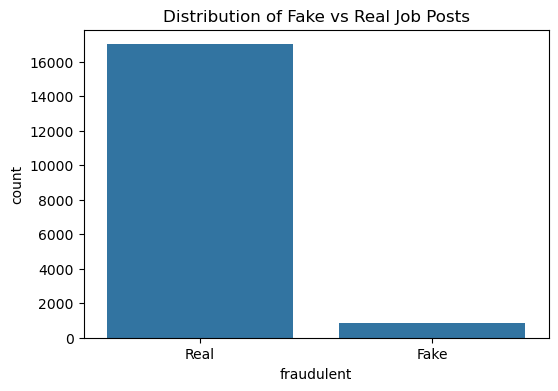

In [73]:
# Distribution of fake vs real jobs
plt.figure(figsize=(6,4))
sns.countplot(x='fraudulent', data=df)
plt.title("Distribution of Fake vs Real Job Posts")
plt.xticks([0,1], ['Real', 'Fake'])
plt.show()

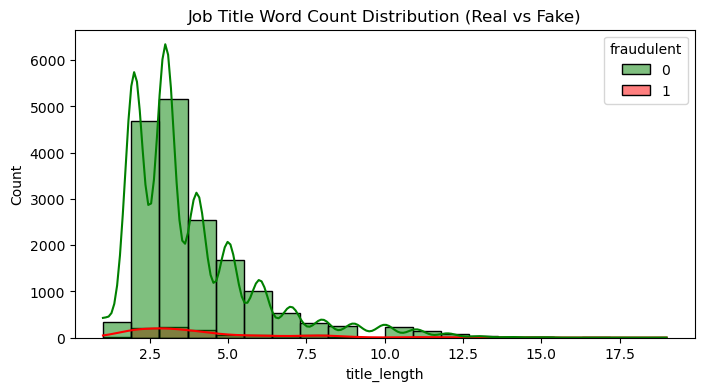

In [35]:
# Job title length analysis
df['title_length'] = df['title'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='title_length', hue='fraudulent', bins=20, kde=True, palette=['green','red'])
plt.title("Job Title Word Count Distribution (Real vs Fake)")
plt.show()


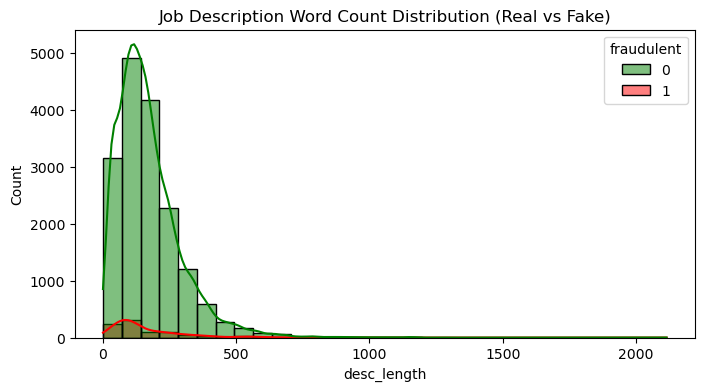

In [36]:
# Job description length analysis
df['desc_length'] = df['description'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='desc_length', hue='fraudulent', bins=30, kde=True, palette=['green','red'])
plt.title("Job Description Word Count Distribution (Real vs Fake)")
plt.show()

## 5.FEATURE EXTRACTION

### TF IDF VECTORIZATION

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['clean_text']).toarray()
y = df['fraudulent']

## 6.MODEL TRAINING AND EVALUATION

### 6.1.IMPORT LIBRARIES

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE



### 6.2.TRAIN AND TEST SPLIT

In [86]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("TRAINING: ",y_train.value_counts())
print()
print("TESTING: ",y_test.value_counts())

TRAINING:  fraudulent
0    13611
1      693
Name: count, dtype: int64

TESTING:  fraudulent
0    3403
1     173
Name: count, dtype: int64


### 6.3.SMOTE FOR BALANCING TESTING DATA

#### SMOTE (Synthetic Minority Over-sampling Technique)

 Target column fraudulent is imbalanced.

#### Why Imbalance Hurts Models
If we just train without balancing:

1.The model can predict "real" for everything and still get 95% accuracy.

2.But recall for fake jobs (catching scams) will be very low — meaning you’ll miss most scams.

3.In your business case (protecting job seekers), missing a scam is more dangerous than flagging a real job by mistake.

#### What SMOTE Does

SMOTE (Synthetic Minority Over-sampling Technique) fixes the imbalance by:

1.Looking at fake job postings (minority class)

2.Finding nearest neighbors for each fake job vector (in your case, after TF-IDF)

3.Creating new, synthetic fake job samples by interpolating between existing ones

📌 It’s not just copying rows — it generates new, slightly different fake jobs that look realistic in feature space.

In [87]:

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:\n", y_train.value_counts())
print("\nAfter SMOTE:\n", y_train_res.value_counts())

Before SMOTE:
 fraudulent
0    13611
1      693
Name: count, dtype: int64

After SMOTE:
 fraudulent
0    13611
1    13611
Name: count, dtype: int64


### NOTE:

SMOTE is only applied to the training set so the model learns from balanced data.

The test set stays imbalanced because it should reflect real-world conditions where fake jobs are rare.

If we applied SMOTE to the test set, we’d be testing on artificial data, which would give an unrealistic performance score.

In [88]:
model = LogisticRegression()
model.fit(X_train_res, y_train_res)

LogisticRegression()

Accuracy: 0.9731543624161074

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      3403
           1       0.68      0.85      0.75       173

    accuracy                           0.97      3576
   macro avg       0.83      0.91      0.87      3576
weighted avg       0.98      0.97      0.97      3576

ROC-AUC Score: 0.9825757279788829


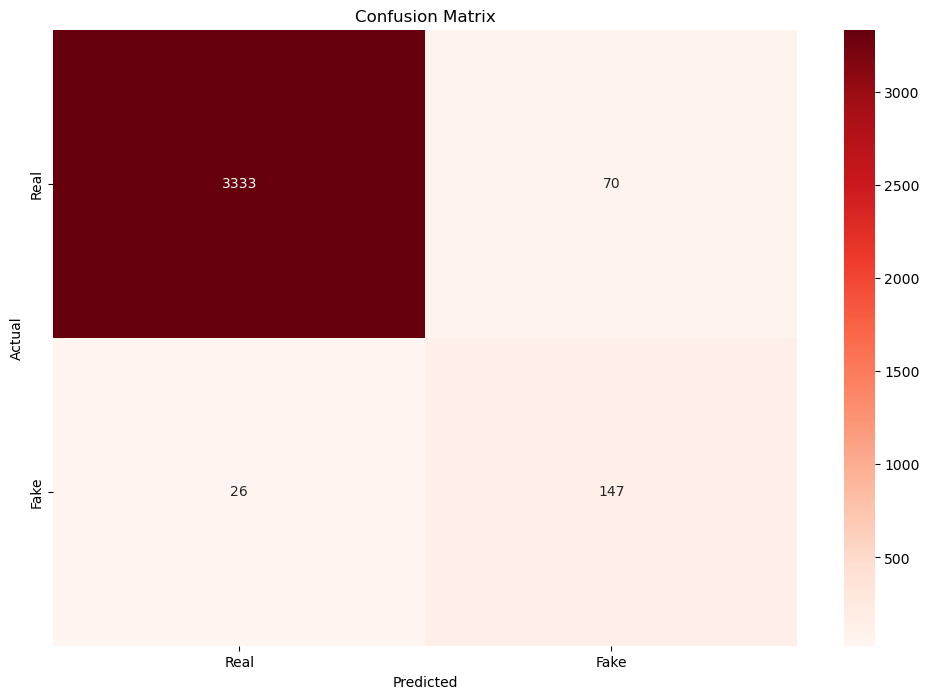

In [89]:

# Predictions
Y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
# Metrics
print("Accuracy:", accuracy_score(y_test, Y_pred))
print("\nClassification Report:\n", classification_report(y_test, Y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))
 
# Confusion Matrix

cm = confusion_matrix(y_test, Y_pred)
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.savefig("confusion matrix.png")
plt.show()

### Interpretation:

#### True Negatives (TN) = 3333

Real jobs correctly classified as real.

#### False Positives (FP) = 70

Real jobs wrongly flagged as fake.

Slightly more false alarms than before (previous model had 0).

#### False Negatives (FN) = 26

Fake jobs wrongly classified as real.

Huge improvement from 104 false negatives in the previous model → now only 26 missed fakes.

#### True Positives (TP) = 147

Fake jobs correctly detected as fake.

### Conclusion:
Balanced approach — still good accuracy, much higher recall (~85%), and a reasonable precision (~68%).

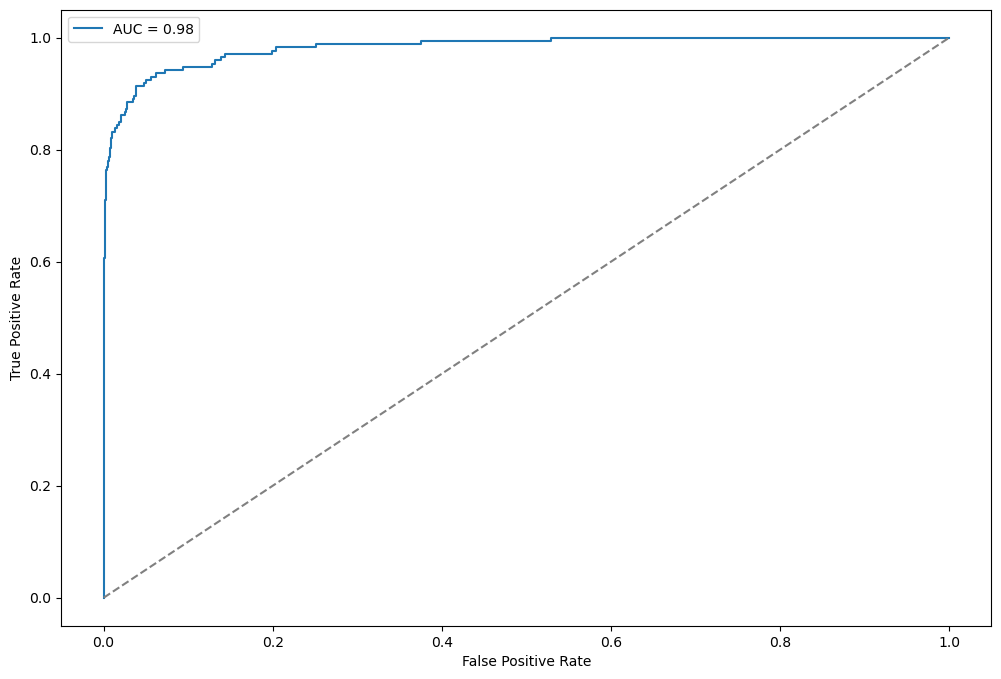

In [90]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
#plt.title(f"{name} - ROC Curve")
plt.legend()
plt.savefig("ROC_curve")
plt.show()

### ROC curve (Receiver Operating Characteristic curve):

X-axis: False Positive Rate (FPR) → the proportion of real jobs incorrectly classified as fake.

Y-axis: True Positive Rate (TPR) → the proportion of fake jobs correctly identified.

Blue curve: The performance of your classifier at various threshold values.

Dashed diagonal line: A random guess baseline (AUC = 0.5). Anything above it is better than random.

#### AUC = 0.98:

#### This means your model is extremely good at distinguishing between real and fake jobs.

AUC (Area Under Curve) close to 1 indicates excellent separability.

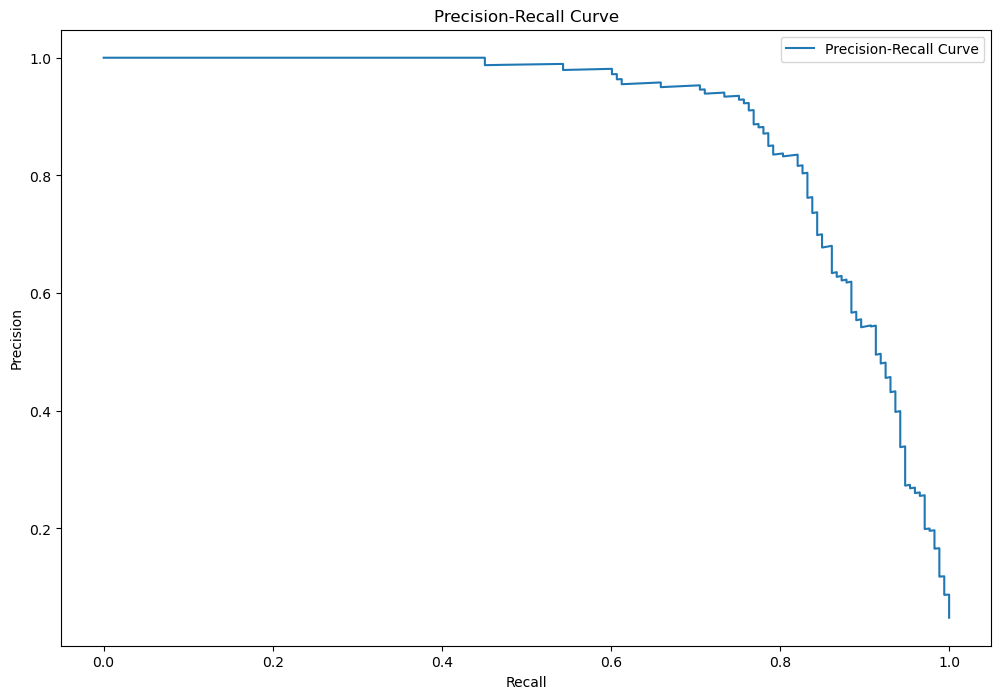

In [91]:
# Precision-Recall Curve plot
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(12,8))
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.savefig("Precision_recall_curve")
plt.show()

### Precision–Recall (PR) curve:

X-axis (Recall): How many of the actual fake jobs were correctly identified.

Y-axis (Precision): Of all jobs predicted as fake, how many were actually fake.

Blue curve: The trade-off between precision and recall for different thresholds.

### Interpretation:

#### High precision at low recall (left side of curve)

At the beginning, when recall is low (you’re only catching a few fake jobs), precision is perfect (≈1.0).

This means when the model predicts “fake” with high certainty, it’s almost never wrong.

#### Shape of curve

Your curve is very high for most of the range, which indicates excellent model performance.

A random classifier would produce a horizontal line at the baseline precision (percentage of fake jobs in the dataset), so this is much better than random.


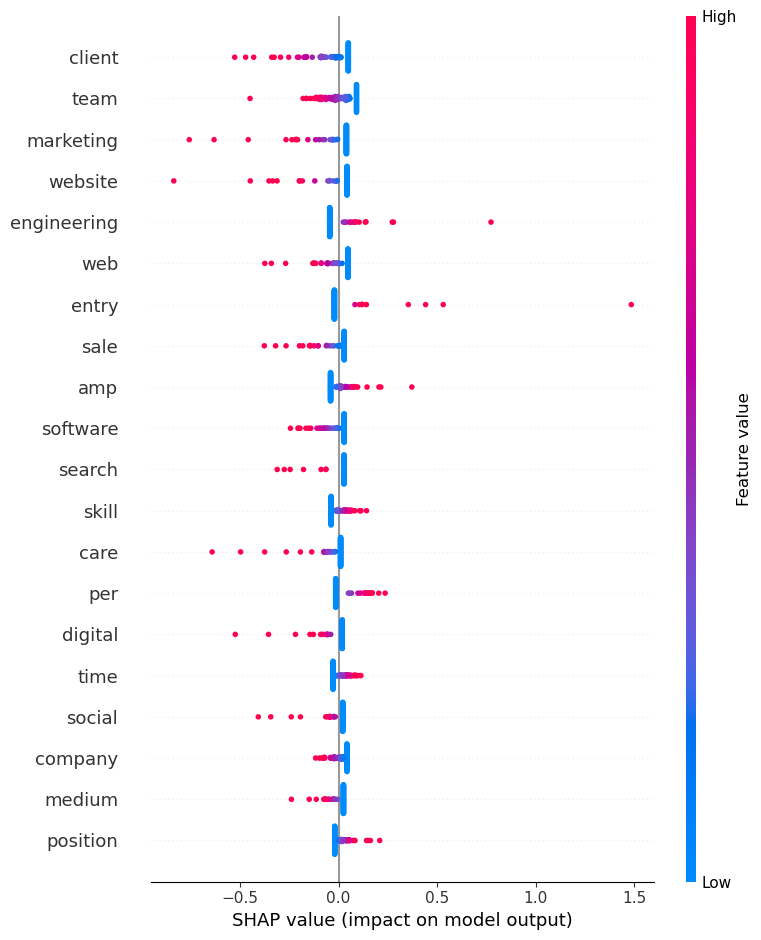

<Figure size 640x480 with 0 Axes>

In [39]:
import shap

explainer = shap.Explainer(model, X_train, feature_names=tfidf_vectorizer.get_feature_names_out())
shap_values = explainer(X_test[:100])
shap.summary_plot(shap_values, features=X_test[:100], feature_names=tfidf_vectorizer.get_feature_names_out())
plt.savefig("shap.png")

### EXAMPLE:

In [84]:
sample_text = ["Data entry, no experience required, earn $5000/week"]
sample_vector = tfidf_vectorizer.transform(sample_text)  # Same TF-IDF used in training
pred = model.predict(sample_vector)[0]
print("Fake Job" if pred == 1 else "Real Job")


Fake Job


## SAVE MODEL

In [41]:
import joblib
joblib.dump(model, "fake_job_model.pkl")
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

# OVERALL SUMMARY

#### 1. Confusion Matrix:

True Positives (TP) = 147 (fake predicted as fake)

True Negatives (TN) = 3333 (real predicted as real)

False Positives (FP) = 70 (real predicted as fake)

False Negatives (FN) = 26 (fake predicted as real)

##### Key takeaway:

Accuracy is extremely high because TN is huge.

Very low FN count means the model rarely misses a fake job.

Low FP means it doesn’t wrongly flag real jobs often either.

#### 2. ROC Curve (AUC = 0.98):

The ROC curve plots True Positive Rate (Recall) vs False Positive Rate.

AUC = 0.98 → The model is almost perfect at ranking fake vs real jobs.

This means if you randomly pick one fake and one real job, there’s a 98% chance the model will give the fake job a higher “fake” score.

##### Key takeaway:

Overall discrimination ability is excellent.

However, ROC can sometimes look optimistic for imbalanced datasets (like job postings detection).

#### 3. Precision–Recall Curve:

Shows the trade-off between precision and recall for different thresholds.

Precision stays close to 1.0 until recall ~0.8.

This means: when the model predicts “fake”, it’s almost always correct — until you try to catch nearly all fakes, at which point precision drops.

The high PR curve shape confirms the model is very strong even for the minority class (fake jobs).


#### ✅ Strengths:

Extremely high accuracy & recall — most fake jobs are detected.

Very low false alarm rate.

Performs well even on imbalanced data (confirmed by PR curve).

ROC-AUC = 0.98 means excellent separability.